# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

# Goodness of fit

In [2]:
df = sns.load_dataset("anscombe"); df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


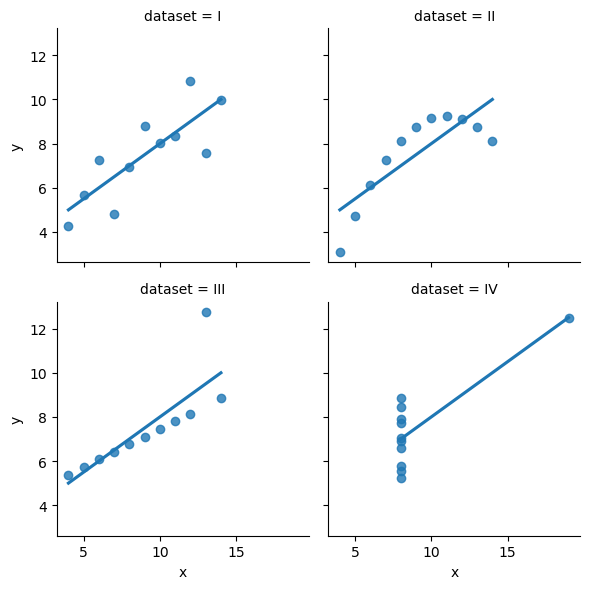

In [3]:
sns.lmplot(x="x", y="y", col="dataset", 
    data=df, col_wrap=2, ci=None, height=3, aspect=1);

In [4]:
df.groupby("dataset").corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [5]:
# Calculate R^2
df.groupby("dataset").corr().iloc[0::2,-1]**2

dataset   
I        x    0.666542
II       x    0.666242
III      x    0.666324
IV       x    0.666707
Name: y, dtype: float64

# Diagnosis
## Constant Variance

In [6]:
# Create some randomly spaced fitted values
n = 50
np.random.seed (123)
x = np.random.sample(n)
x[:5]

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

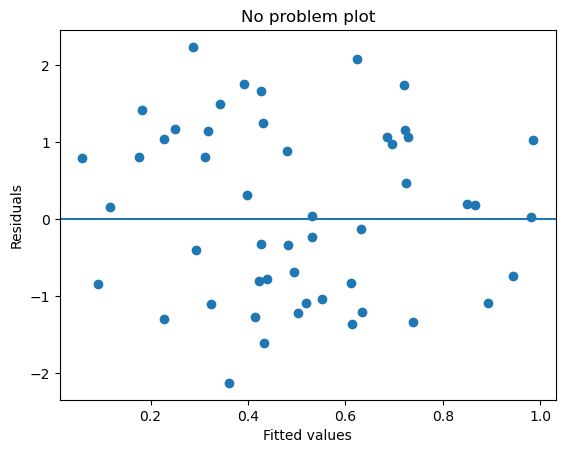

In [7]:
# Create some normally distributed residuals and plot
y = np.random.normal(size=n)
plt.scatter(x, y)
plt.title("No problem plot")
plt.axhline(0); plt.xlabel('Fitted values'); plt.ylabel('Residuals');

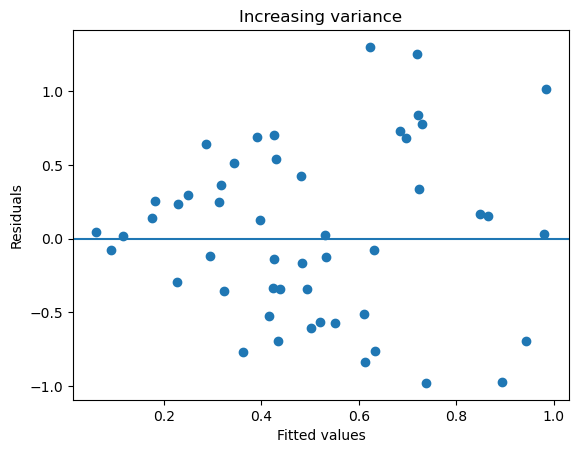

In [8]:
# Increase the variance by multiplying residual by fitted
plt.scatter(x, y*x)
plt.title("Increasing variance")
plt.axhline(0); plt.xlabel('Fitted values'); plt.ylabel('Residuals');

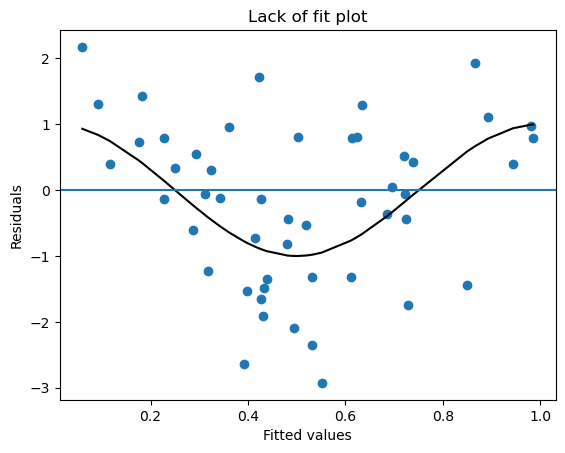

In [9]:
# Nonlinearity
y = np.cos(2*x*np.pi) + np.random.normal(size=n)
plt.scatter(x,y)
plt.title("Lack of fit plot")
sx = np.sort(x)
plt.plot(sx, np.cos(2*sx*np.pi),'k-')
plt.axhline(0); plt.xlabel('Fitted values'); plt.ylabel('Residuals');

### Generate artificial plots
The true relationship is known.

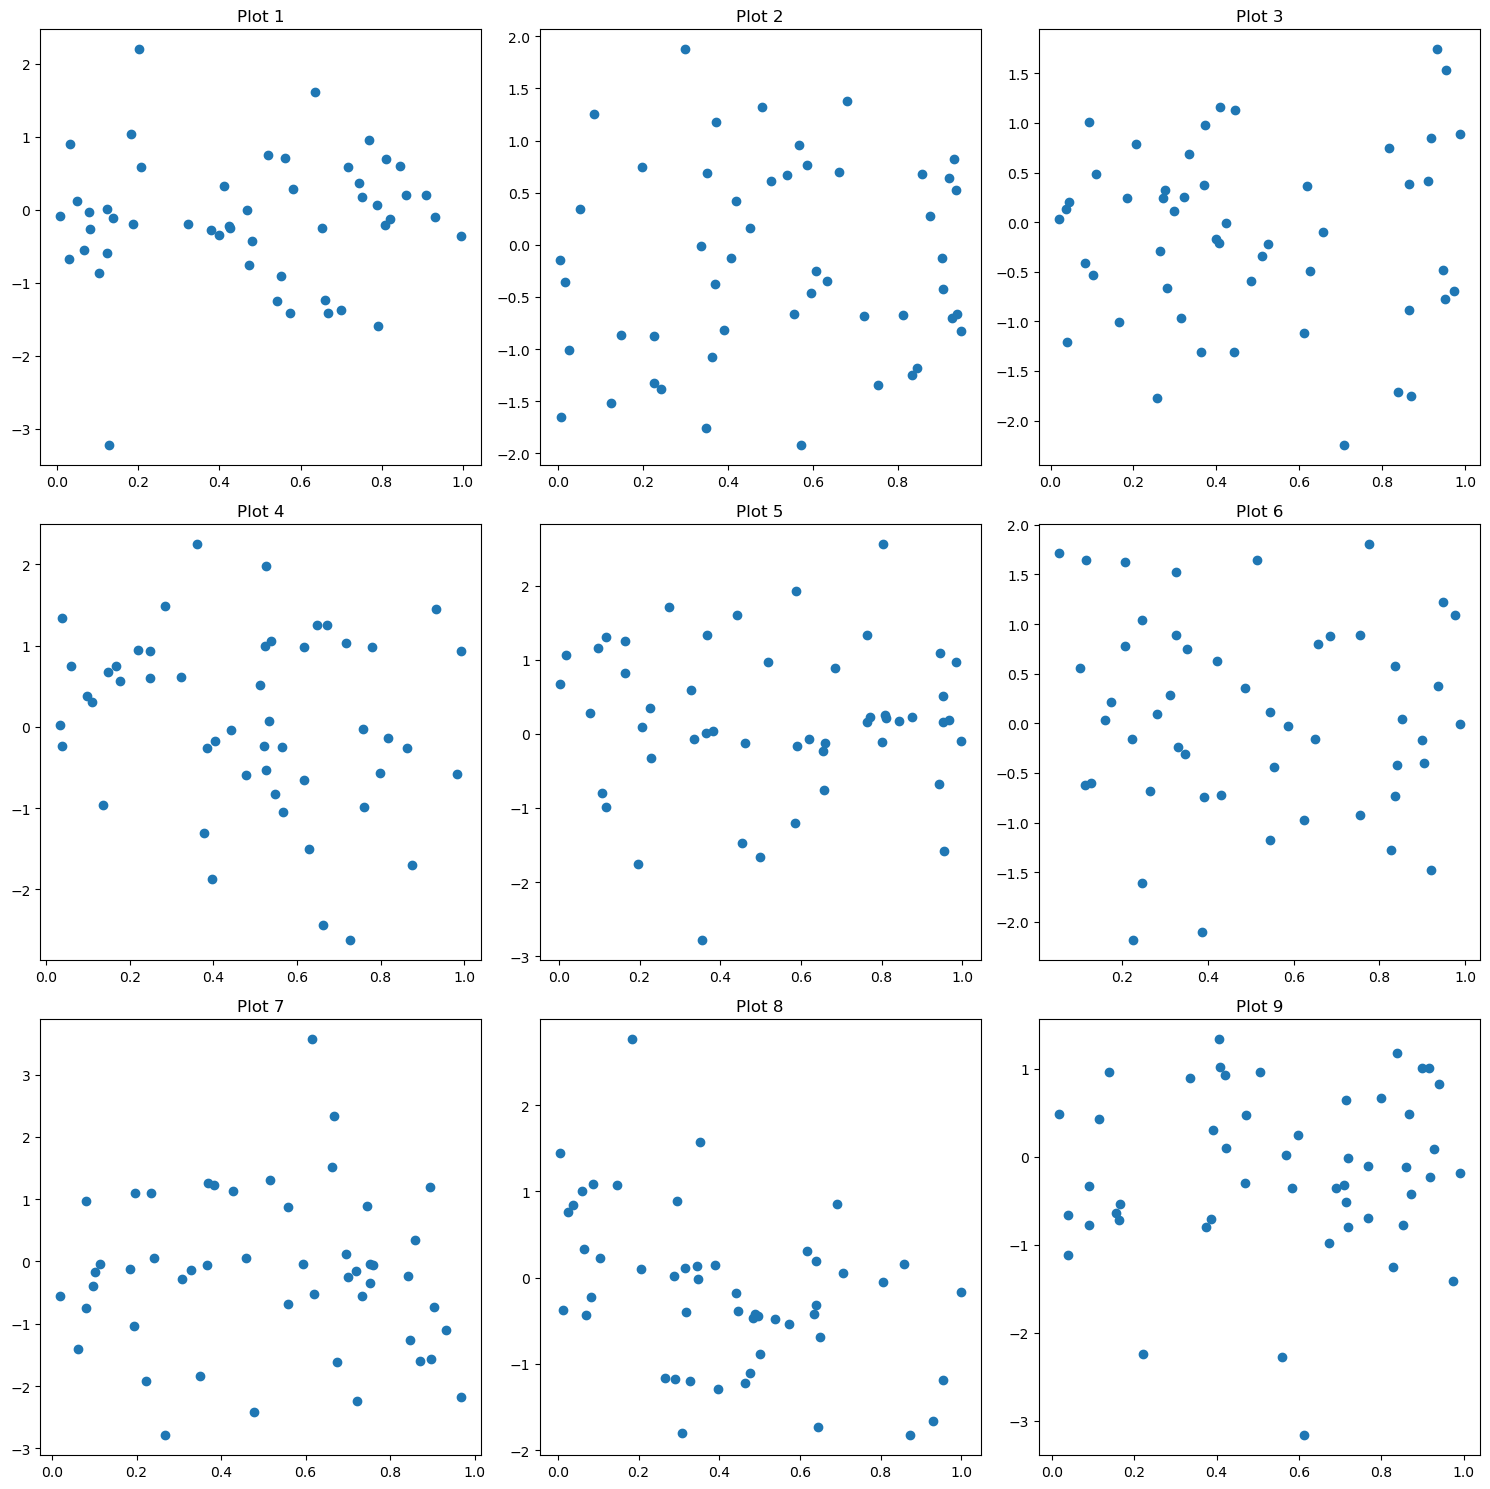

In [10]:
# Set up a 3x3 grid for the plots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
n = 50
# Constant variance
for i in range(3):
    for j in range(3):
        x = np.random.uniform(size=n)
        axs[i, j].scatter(x, np.random.normal(size=n))
        axs[i, j].set_title(f'Plot {i*3 + j + 1}')
plt.tight_layout(); plt.show()

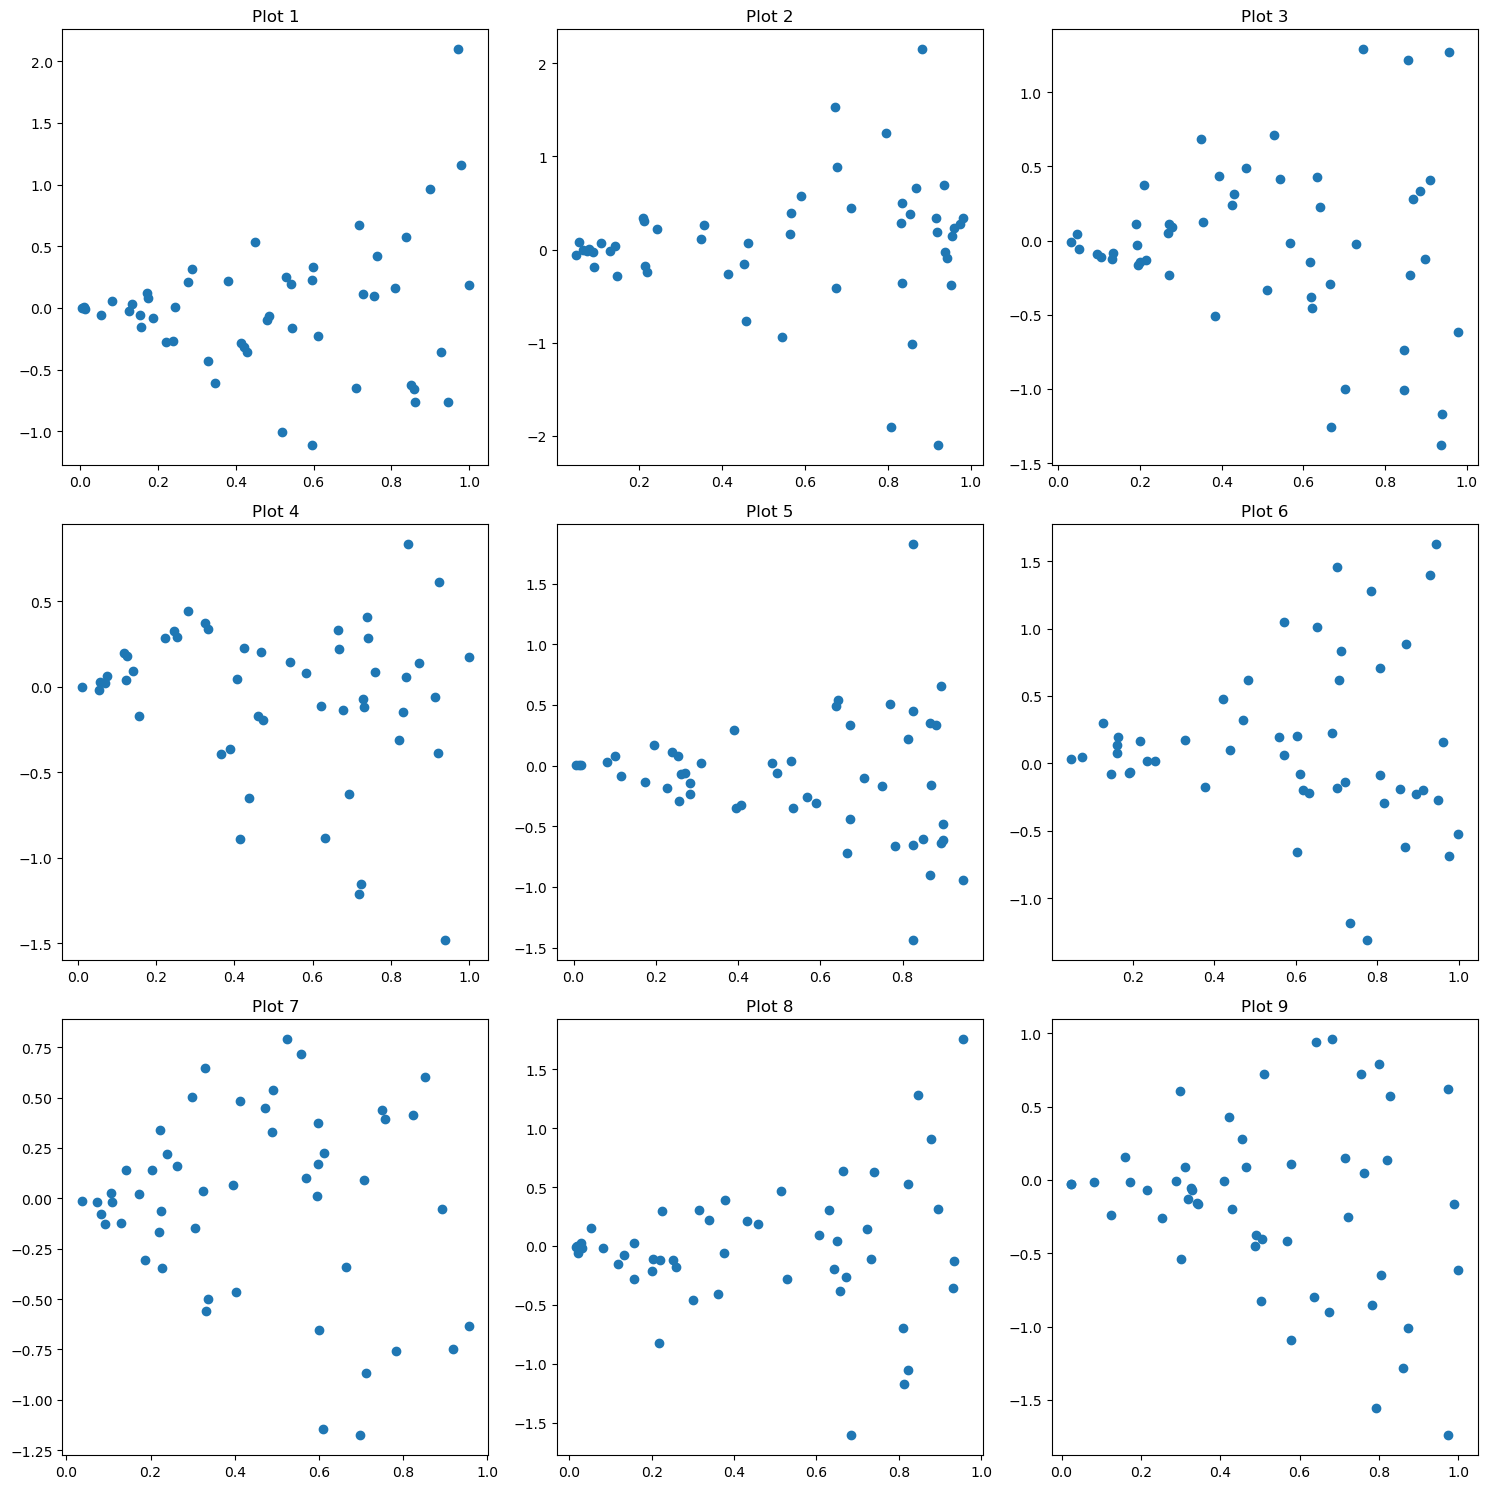

In [11]:
# Strong nonconstant variance
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        x = np.random.uniform(size=n)
        axs[i, j].scatter(x, x * np.random.normal(size=n))
        axs[i, j].set_title(f'Plot {i*3 + j + 1}')
plt.tight_layout(); plt.show()

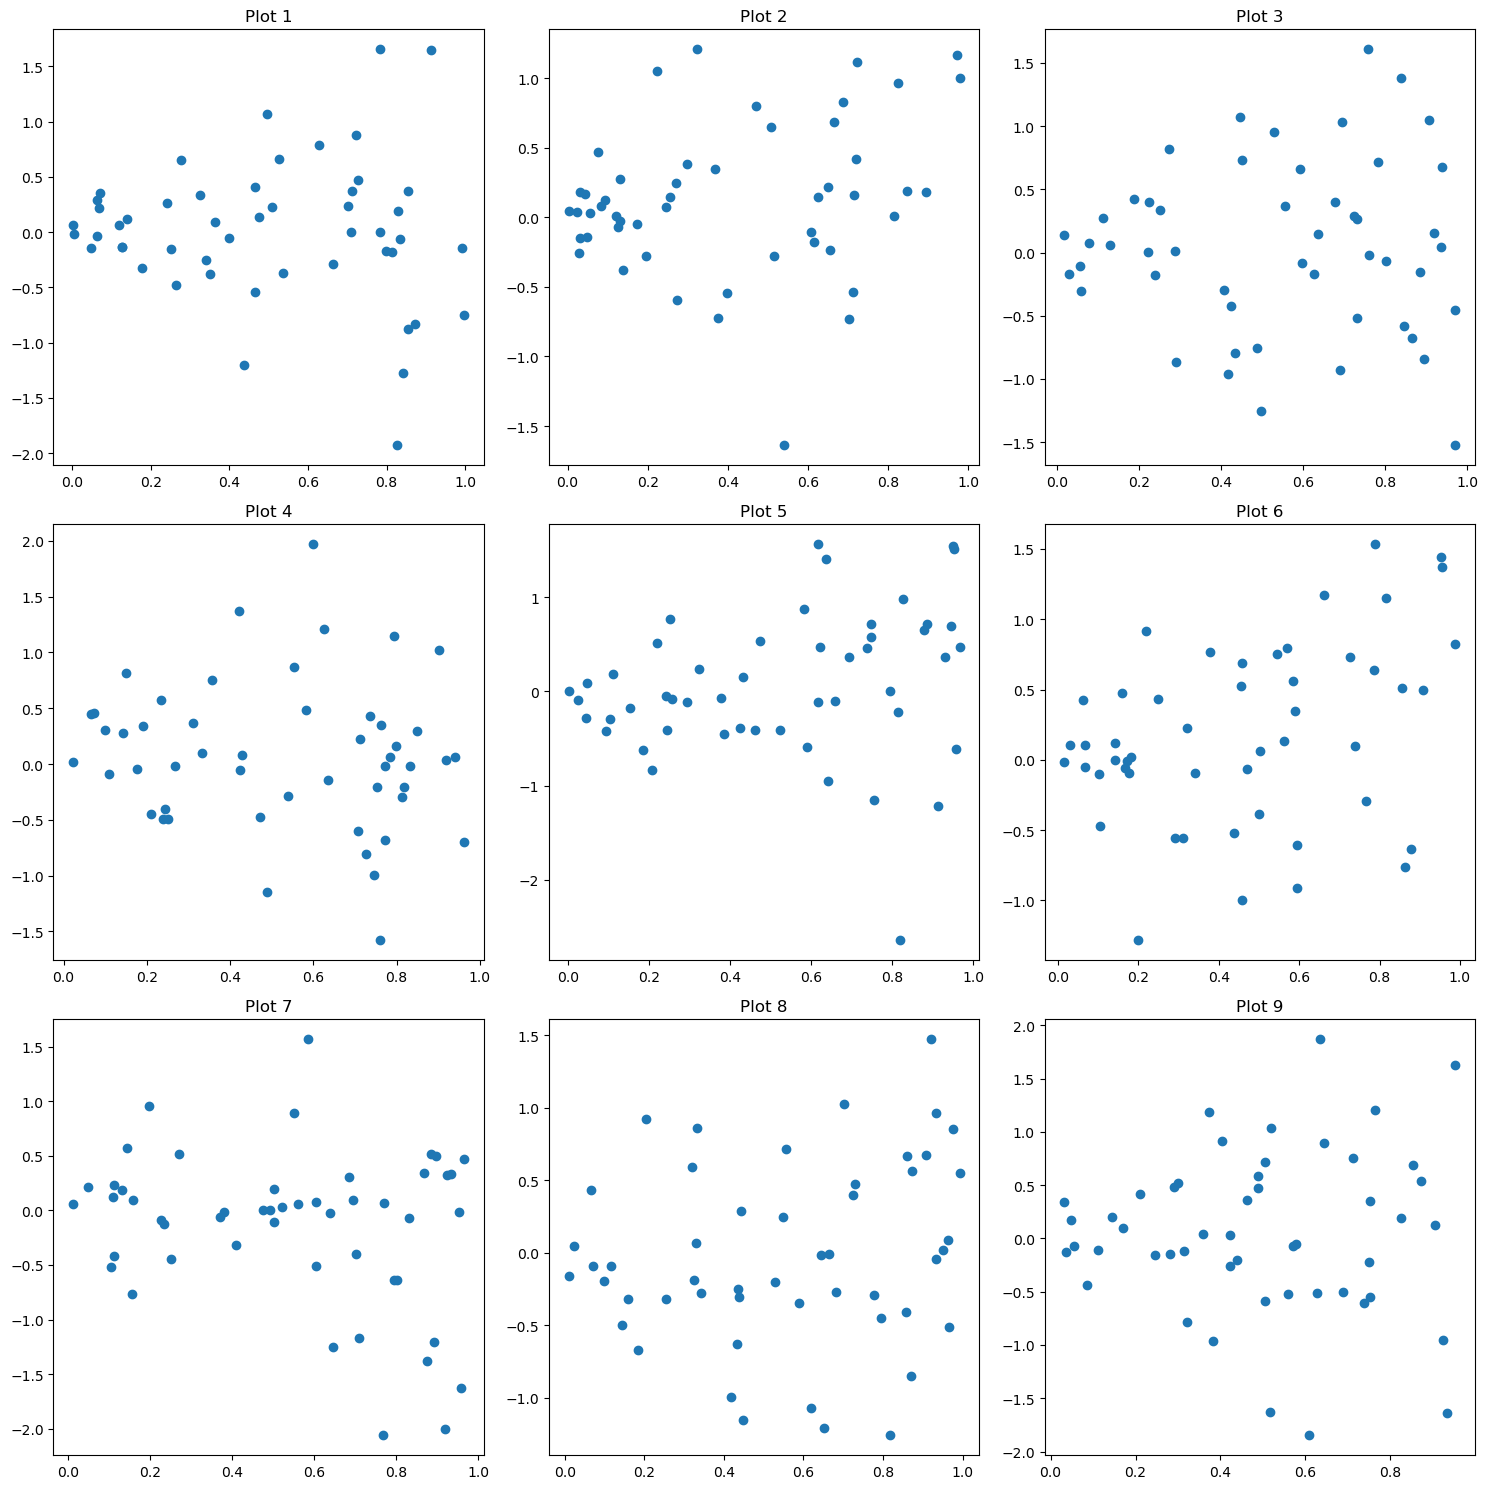

In [12]:
# Mild nonconstant variance
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        x = np.random.uniform(size=n)
        axs[i, j].scatter(x, np.sqrt(x) * np.random.normal(size=n))
        axs[i, j].set_title(f'Plot {i*3 + j + 1}')
plt.tight_layout(); plt.show()

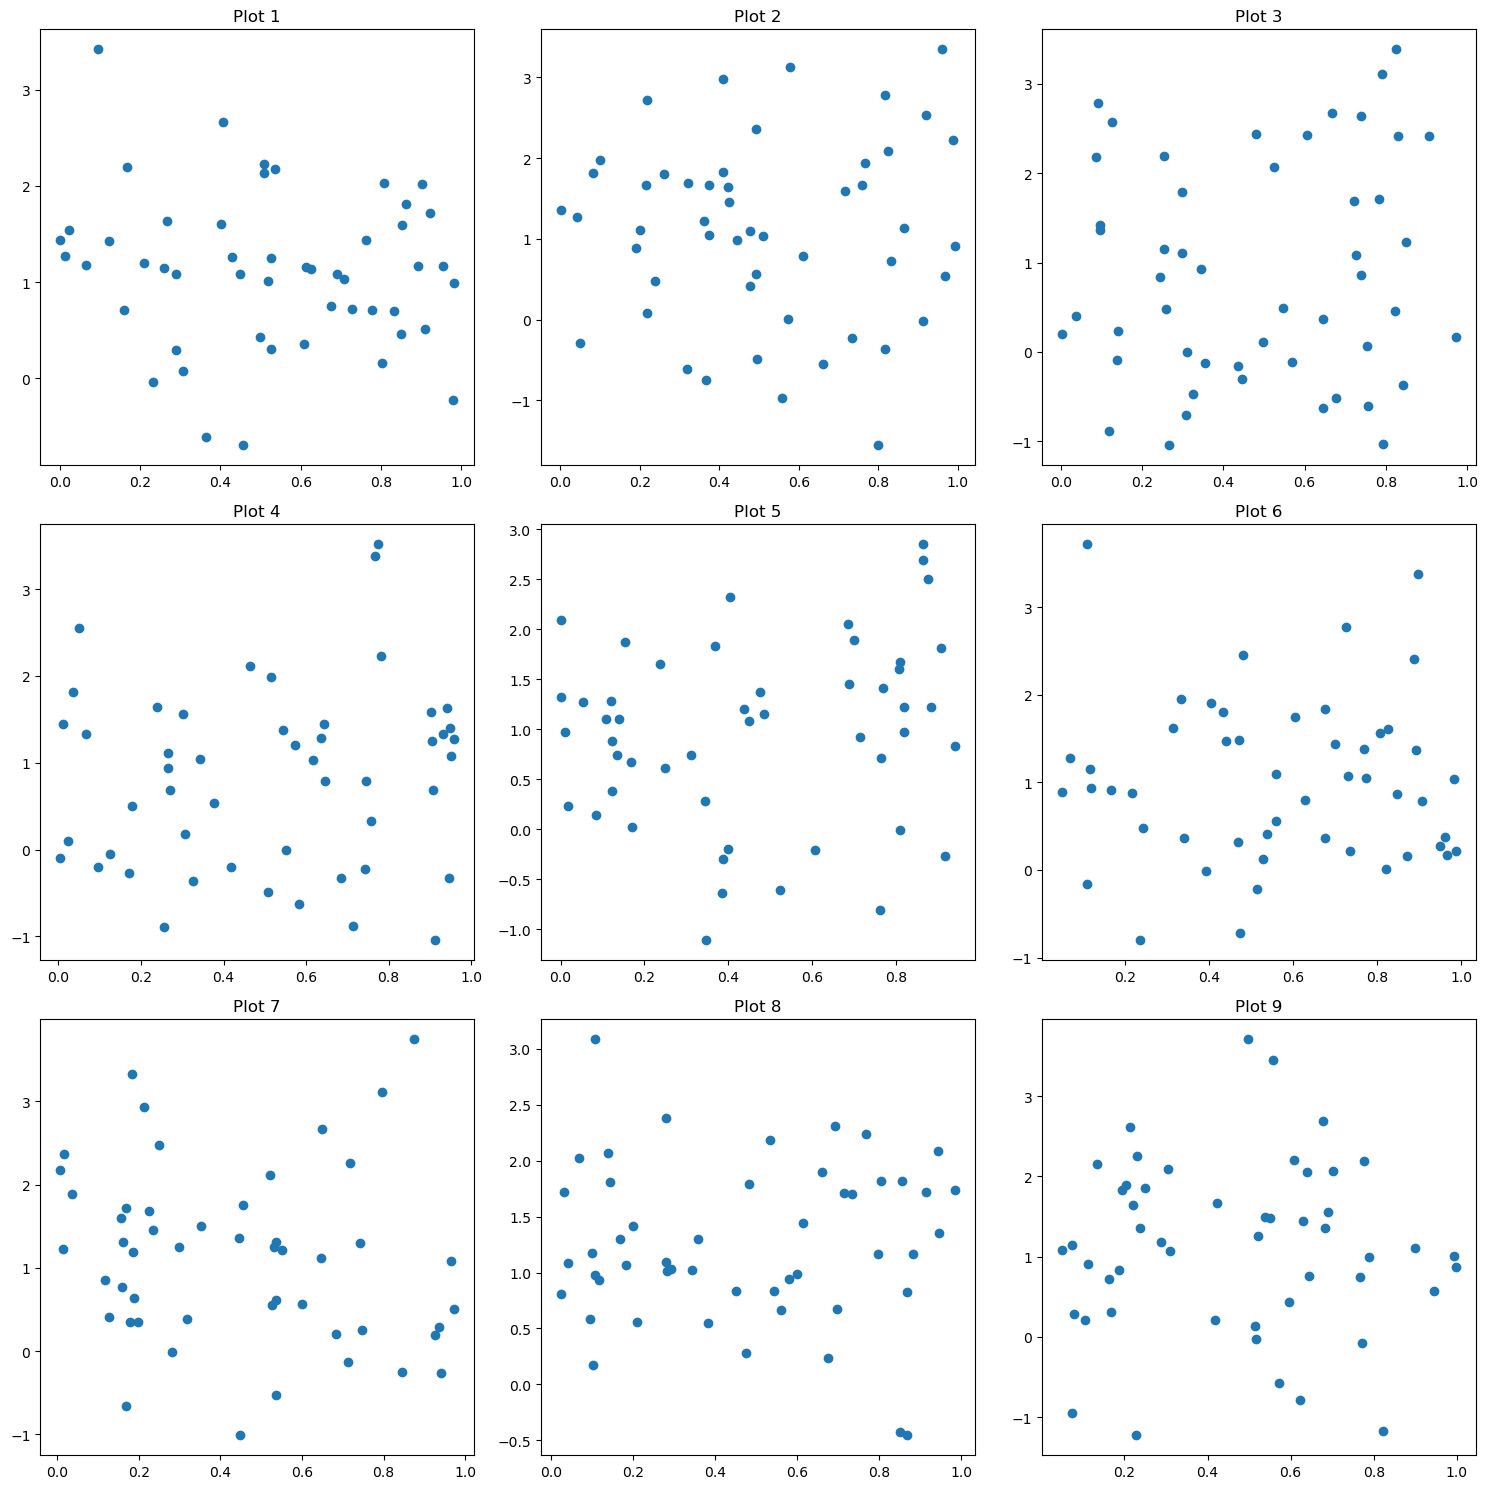

In [13]:
# Nonlinearity
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        x = np.random.uniform(size=n)
        axs[i, j].scatter(x, np.cos(x * np.pi / 25) + np.random.normal(scale=1, size=n))
        axs[i, j].set_title(f'Plot {i*3 + j + 1}')
plt.tight_layout(); plt.show()

In [14]:
# Reset to default single plot layout
plt.figure();

<Figure size 640x480 with 0 Axes>

## Normality

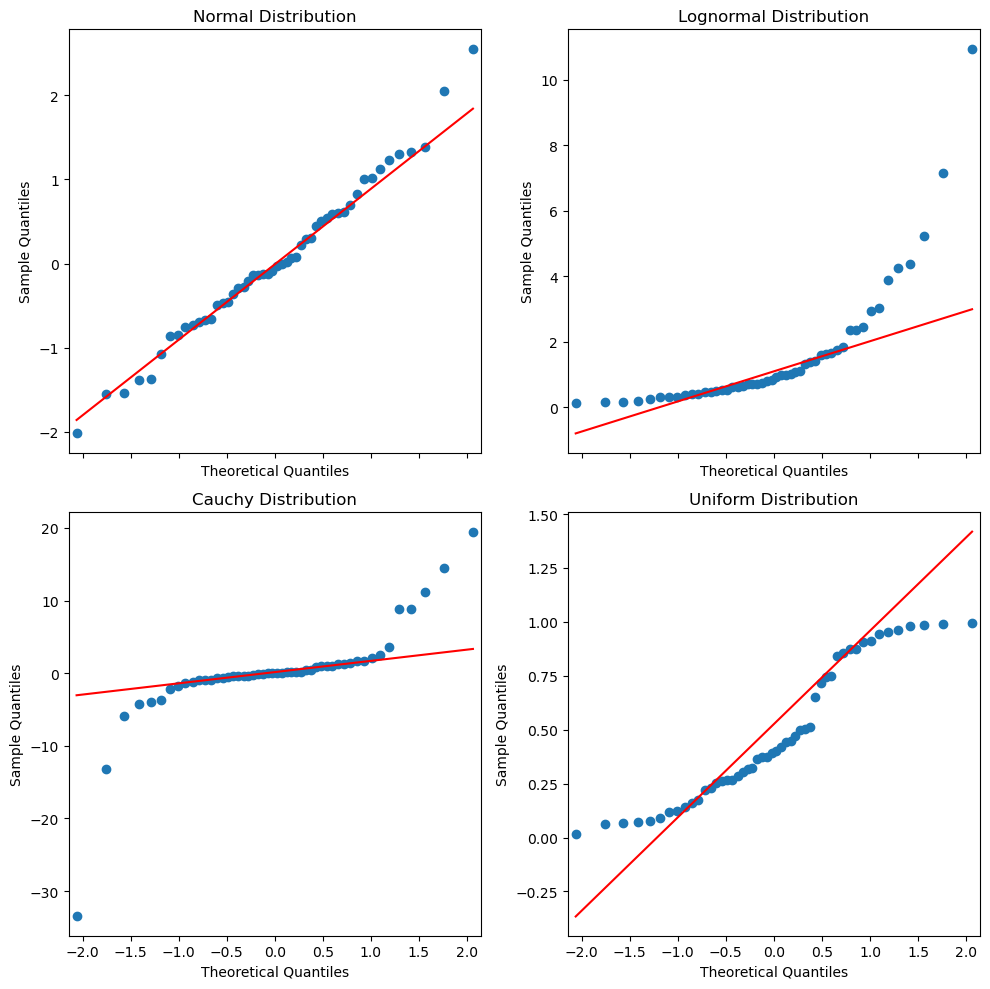

In [15]:
# Simulation for Q-Q plot
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 10))
# Normal
sm.qqplot(np.random.normal(size=50), line="q", ax=axs[0, 0])
axs[0, 0].set_title('Normal Distribution')
# Lognormal - an example of a skewed distribution 
sm.qqplot(np.exp(np.random.normal(size=50)), line="q", ax=axs[0, 1])
axs[0, 1].set_title('Lognormal Distribution')
# Cauchy - an example of a long-tailed (leptokurtic) distribution
sm.qqplot(np.random.standard_t(1, size=50), line="q", ax=axs[1, 0])
axs[1, 0].set_title('Cauchy Distribution')
# Uniform - an example of a short-tailed (platykurtic) distribution
sm.qqplot(np.random.sample(size=50), line="q", ax=axs[1, 1])
axs[1, 1].set_title('Uniform Distribution')
plt.tight_layout(); plt.show();

## Outliers

In [16]:
np.random.seed(123)
testdata = pd.DataFrame({'x' : np.arange(1,11), 
    'y' : np.arange(1,11) + np.random.normal(size=10)})
p1 = pd.DataFrame({'x': [5.5], 'y':[12]})
alldata = pd.concat([testdata, p1], ignore_index=True)

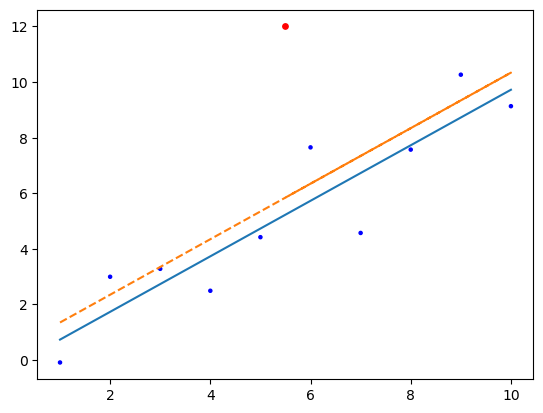

In [17]:
marksize = np.ones(11)
marksize[10] = 3
colors = ['blue'] * 10 + ['red']
plt.scatter(alldata.x, alldata.y, s= marksize*5, c=colors)
slope, intercept = np.polyfit(testdata.x, testdata.y,1)
plt.plot(testdata.x, intercept + slope * testdata.x)
slope, intercept = np.polyfit(alldata.x, alldata.y,1)
plt.plot(alldata.x, intercept + slope * alldata.x, '--');

The first plot shows a solid regression line without the extra point marked with a cross. The dashed line includes this extra point. There’s not much difference between the two lines, especially in their slopes. This is an example of an outlier that doesn’t have much leverage or influence.

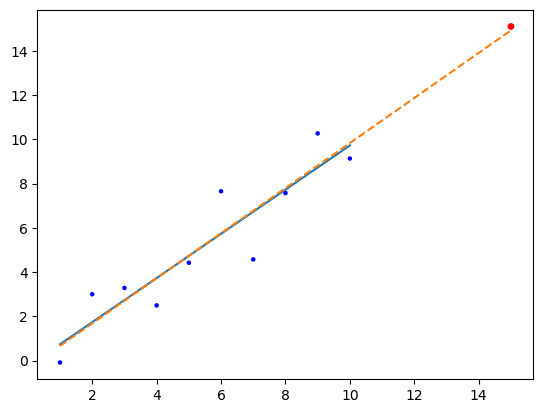

In [18]:
p1 = pd.DataFrame({'x': [15], 'y':[15.1]})
alldata = pd.concat([testdata, p1], ignore_index=True)
plt.scatter(alldata.x, alldata.y, s= marksize*5, c=colors)
slope, intercept = np.polyfit(testdata.x, testdata.y,1)
plt.plot(testdata.x, intercept + slope * testdata.x)
slope, intercept = np.polyfit(alldata.x, alldata.y,1)
plt.plot(alldata.x, intercept + slope * alldata.x, '--');

The second plotshows that the extra point doesn’t significantly change the fitted regression line. This point has high leverage but isn’t an outlier and doesn’t have much influence.

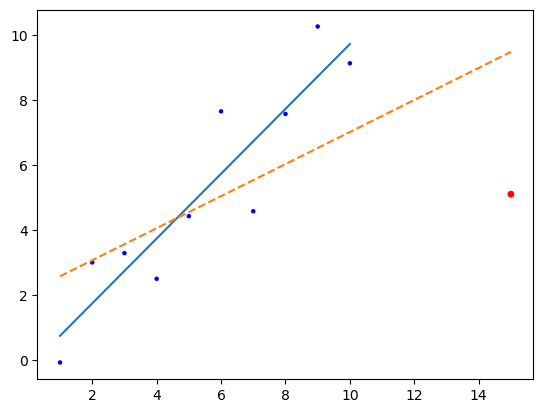

In [19]:
p1 = pd.DataFrame({'x': [15], 'y':[5.1]})
alldata = pd.concat([testdata, p1], ignore_index=True)
plt.scatter(alldata.x, alldata.y, s= marksize*5, c=colors)
slope, intercept = np.polyfit(testdata.x, testdata.y,1)
plt.plot(testdata.x, intercept + slope * testdata.x)
slope, intercept = np.polyfit(alldata.x, alldata.y,1)
plt.plot(alldata.x, intercept + slope * alldata.x, '--');

The third plot shows that the extra point significantly changes the regression line. This point has a large residual, and it also increases the residuals of other points. Therefore, it is both an outlier and an influential point. It’s important to identify such points because they can greatly affect the analysis. Simply looking at residuals can miss these tricky observations, as they pull the regression line closer and hide their true impact.